In [1]:
import matplotlib.pyplot as plt
import math
import torch
import numpy as np
import pandas as pd

import datajoint as dj
dj.config['database.host'] = 'at-database.ad.bcm.edu:3306'

dj.conn()


Please enter DataJoint username:  mdiamantaki
Please enter DataJoint password:  ·············


Connecting mdiamantaki@at-database.ad.bcm.edu:3306


DataJoint connection (connected) mdiamantaki@at-database.ad.bcm.edu:3306

In [4]:
meis = dj.create_virtual_module('meis.py', 'mouse_neuropixels_meis')

In [8]:
#define the external storage
dj.config['stores'] = {
  'minio': dict( # 'raw' storage for this pipeline
                protocol='file',
                location='/mnt/dj-stor01/users/maria/mouse_neuropixels_meis') #'cifs://at-storage5.ad.bcm.edu/dj-stor01/users/maria/''
}


In [5]:
meis.MEI()

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,43,28470-13-1,1000,=BLOB=,2.97301,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,51,28470-13-1,1000,=BLOB=,1.88006,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,85,28470-13-1,1000,=BLOB=,2.29115,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,102,28470-13-1,1000,=BLOB=,2.44374,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,106,28470-13-1,1000,=BLOB=,2.02265,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,107,28470-13-1,1000,=BLOB=,2.80873,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,111,28470-13-1,1000,=BLOB=,2.33421,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,116,28470-13-1,1000,=BLOB=,1.50931,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,120,28470-13-1,1000,=BLOB=,2.43148,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,126,28470-13-1,1000,=BLOB=,3.16019,=BLOB=


In [9]:
#for the SOTA model
mei_key =  dict(data_key="28470-13-1", 
                    dataset_hash="17a917c720720314835865d32cac93f3",
                    ensemble_hash = "7ea32448df4a75966d8fcd059a6eb0ae",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

mei_dict = (meis.MEI & mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(mei_dict)

mei_paths = [i.pop("mei") for i in mei_dict]

MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in mei_paths])

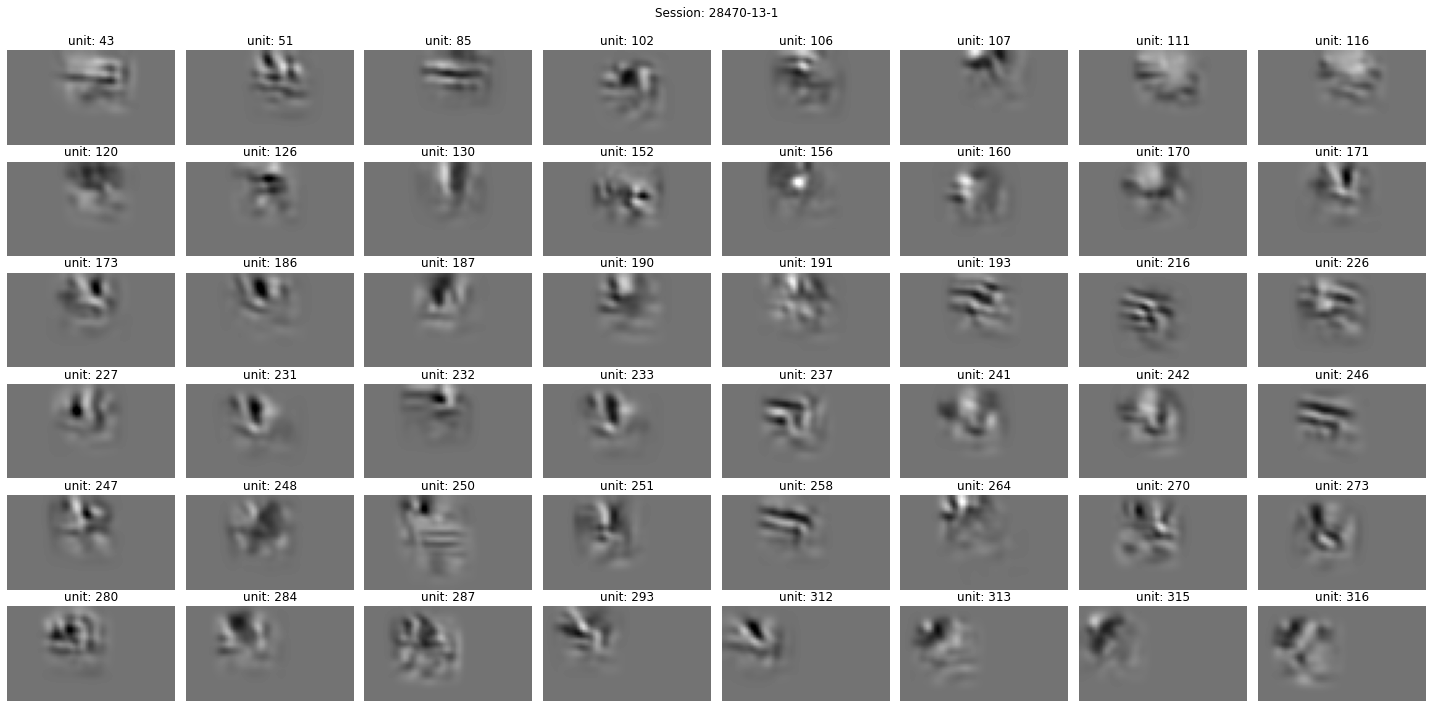

In [11]:
fig, axs = plt.subplots(6,8, figsize=(20,10))
for i, ax in enumerate(axs.ravel()):
    if i < len(MEIs):
        ax.imshow(MEIs[i], cmap="gray", vmin=-1.8, vmax=2.2)
        ax.set_title(f'unit: {mei_dict[i]["unit_id"]}')
    ax.axis("off")
plt.suptitle(f'Session: {mei_key["data_key"]}')
fig.tight_layout()
fig.subplots_adjust(top=0.92) 
#fig.savefig(f'{mei_key["data_key"]}_meis.pdf')